## Building Neural Network with 2 layers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs , make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

In [3]:
# we must add weights and biais from the other layers, in this function
# we will only work on specific 2 layers ANN

def init_2l_func(n0,n1,n2):
    # we add n0 ,n1 , and n2 wich are the dimensions of matrixes 
    # n0 = number of input parameters
    # n1 = number of neurals in first layer  
    # n2 = number of neural in second layer
    W1 = np.random.randn(n0,n1)
    b1 = np.random.randn(n1,1)
    W2 = np.random.randn(n2,n1)
    b2 = np.random.randn(n2,1)
    parameters = \
    {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2,
    }
    return parameters

In [4]:
# we will modify the model function to make  it forward propagation function
# we will give it the dict as input cause it contains all our data

def forward_propagation(X, parametrs):
    # first we retrieve all our parameters from the dict
    
    W1 = parametrs["W1"]
    b1 = parametrs["b1"]
    W2 = parametrs["W2"]
    b2 = parametrs["b2"]
    
    # we inverse the matrix product because we transposed the matrixes to put
    # W weights first
    
    # function of layer 1 and activation of layer 1
    
    Z1 = W1.dot(X) + b1
    A1 = 1/(1+np.exp(-Z1)) 
    
    # function of layer 2 and activation of layer 2
    
    Z2 = W2.dot(A1) + b2
    A2 = 1/(1+np.exp(-Z2))
            
    # normally, what is logic is to return the output of our neural netowork
    # wich is A2, but here we will return also A1 because we will need it later 
    # for backpropagation, that's why we again create dict with both activations
    
    activations = \
    {
        "A1":A1,
        "A2":A2
    }
    
    return activations
    

In [5]:
# we modify the previous gradient function to rename it backpropagation
# check " red snake architecture" in your abs notebook you will find a series
# of equations (part diff equt) we will need X,y,W2,A1,A2 those 
# are the variables involved in the process of back propg

def back_propagation (X, y, activations, parameters):
    
    # first we xtract A1 , A2 , W2 from the input
    
    A1 = activations["A1"]
    A2 = activations["A2"]
    W2 = parameters["W2"]
    
    # 1/m is equivalent to 1/len(y) 
    
    m = y.shape[1]
    
    # implementing "red snake"
    # layer 2

    dZ2 = A2 - y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True) # to avoid broadcasting in numpy
    
    # layer 1
    
    dZ1 = np.dot(W2.T,dZ2) * A1 * (1-A1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    # again we createa  dictionanry gradients to contain the 4 gradients
    # of the four parameters W1,W2,b1,b2
    
    gradients = \
    {
        "dW1":dW1,
        "dW2":dW2,
        "db1":db1,
        "db2":db2
    }
    return gradients

In [44]:
def log_loss_func(A,y):
    return (1/len(y)) * np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

In [6]:
# we add the other parameters and update them similaraly to what we did
# with one layer of neural network 

def update_2l(gradients, parameters, learning_rate):
    
    # extraction of the gradient and parameters
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
    
    # update operatoin using the learning rate 
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    # storing in same dict to overwriting for the next iteration so
    # we have the updated parameters
    
    parameters = \
    {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2,
    }
    return parameters

In [7]:
# same way we modify predict replacing W,b by dictionnary parameters

def predict_2l(X, parameters):
    
    activations = forward_propagation(X,parameters)
    A2 = activations["A2"]
    
    
    return A2 >= 0.5

In [42]:
# now we finally have to gather all of our functions around the gradient descent 
# algorithm 

def neural_network(X, y, n1, learning_rate = 0.1, n_iter = 100):
    
    #initialization of the dict parameters
    
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parameters = init_2l_func(n0, n1, n2)
    
    train_loss = [] # stores values of loss function
    train_acc = [] #stores values of accuracy
    history = [] # stores progression of both loss and acc and also the final parameters
    
    # we use the tqdm "taqadom" library to visualize 
    # the progress of our epochs
    
    for i in tqdm(range(n_iter)):
        
        activations = forward_propagation(X, parameters)
        A2 = activations['A2']

  
        # store values in list in order to plot them
        # we flatten the arrays because they re 2D arrays
        
        train_loss.append(log_loss_func(A2.flatten(), y.flatten()))
        
        # generate Y hat or y pred to compare with result of network 
        # in order to send to back prop
        
        y_pred = predict_2l(X, parameters)
        
        # same for acc plot
        
        current_accuracy = accuracy_score(y.flatten(), y_pred.flatten())
        train_acc.append(current_accuracy)
        
        # filling the history list to track progression respectively to iteration
        
        history.append([parameters.copy(), train_loss, train_acc, i])
        
        # applying back prop after reaching end of network
            
        gradients = back_propagation(X, y, activations, parameters)
        
        # updating new fixed values for a new iteration means new forw prop
        
        parameters = update_2l(gradients, parameters, learning_rate)
    
    # plot the loss function evolution

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss function')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train accuracy')
    plt.legend()
    plt.show()
    
    return parameters

#### Dataset application

dimensions de X: (2, 100)
dimensions de y: (1, 100)


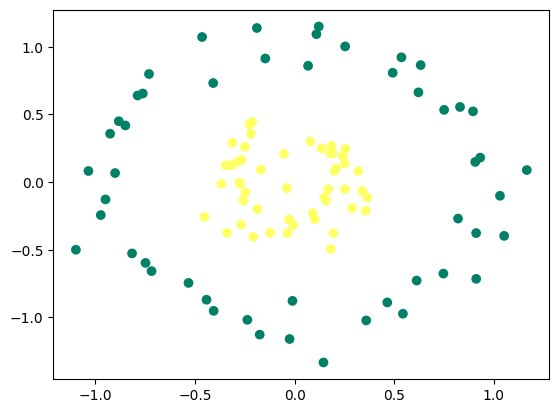

In [27]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1484.77it/s]


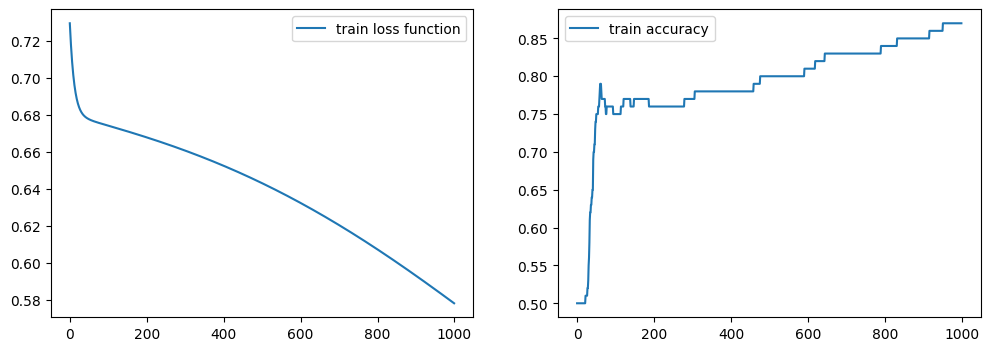

{'W1': array([[2.89561966, 1.25919651],
        [1.72097721, 2.92665913]]),
 'b1': array([[ 1.82935899],
        [-1.87117123]]),
 'W2': array([[ 1.93654002, -2.26858631]]),
 'b2': array([[-0.94900281]])}

In [43]:
parameters = neural_network(X, y, n1=2, n_iter=1000, learning_rate=0.1)
parameters

### Deduction :

    The parameters you see displayed on the screen are the perfect weights and biaises generated following the gradient descent, those parameters are the final ones that the network will use in the future.

    We also notice that the loss plot is decreasing while the accuracy plot is in increasing via iterations wich shows that our 2D neural network works perfectly
 